In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

In [2]:

# reading the multi-looked wrapped interferogram
ds = gdal.Open("/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.unw_snaphu.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None

## Read files to be plotted
# Files from ISCE (Radar coordinates)
w_int = '/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.int'
ds = gdal.Open(w_int, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

cohe = '/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.coh'
ds = gdal.Open(cohe, gdal.GA_ReadOnly)
coh = ds.GetRasterBand(1).ReadAsArray()
ds = None

#wamask = 'Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.wmask'
#ds = gdal.Open(wamask, gdal.GA_ReadOnly)
#wmask = ds.GetRasterBand(1).ReadAsArray()
#ds = None

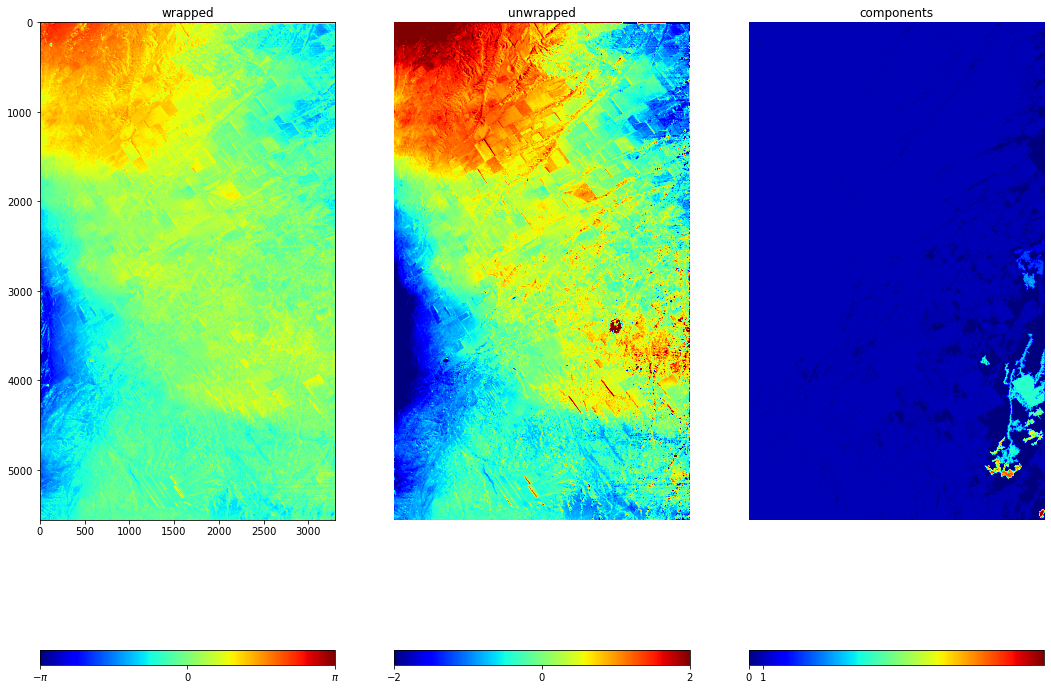

In [3]:


fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw, vmin = -2, vmax = 2, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-2,0, 2], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components, cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0, 1] , orientation='horizontal')
cbar.ax.set_xticklabels([0,1])


connected_components = None

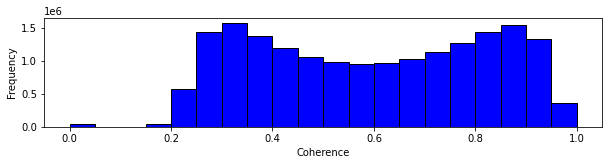

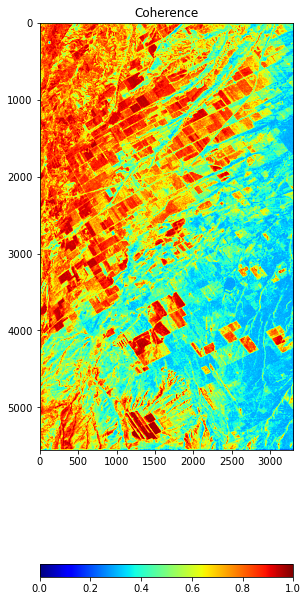

In [4]:
## Coherence plots

# Plots
# Histogram plots
fig = plt.figure(figsize=(10, 2))

ax = fig.add_subplot(1,1,1)
cax = ax.hist(coh.ravel(), bins=20, range=(0.0, 1.0), fc='b', ec='k')
plt.xlabel('Coherence'); plt.ylabel('Frequency')

fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow(coh, vmin = 0 , vmax = 1.0, cmap = 'jet')
ax.set_title("Coherence")
#ax.set_axis_off()
cbar = fig.colorbar(cax,orientation='horizontal')

#ax = fig.add_subplot(1,2,2)
#cax = ax.imshow(wmask, vmin = 0 , vmax = 1.0, cmap = 'Greys')
#ax.set_title("Coherence Mask")
#ax.set_axis_off()
#cbar = fig.colorbar(cax,orientation='horizontal')